# Python Project

# Electric Vehicle Data Analysis 

 Project Overview : 
This project analyze a dataset related to electric vehicles (EVs). The dataset contains
electric range, energy consumption, price, and other relevant
attributes. Our goal is to conduct a thorough analysis to uncover meaningful insights, tell a
 compelling story, conduct hypothesis testing and provide actionable recommendations based on
 the data.

In [13]:
# Importing all the python libraries which are necessary to perform the tasks. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats 

In [ ]:
# To read the dataframe , I've created a variable fev_df which contains the dataframe.

fev_df = pd.read_excel("FEV-data-Excel.xlsx") 
fev_df

# Task 1

 A customer has a budget of 350,000 PLN and wants an EV with a minimum range of 400 km.

a) Task is to filter out EVs that meet these criteria

b) Group them by the manufacturer

c) Calculate the average battery capacity for each manufacturer. 

In [21]:
EVs_under_budget= fev_df[ (fev_df["Minimal price (gross) [PLN]"]<=350000) & (fev_df["Range (WLTP) [km]"]>=400) ]
EVs_under_budget

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,438,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
8,BMW iX3,BMW,iX3,282900,286,400,disc (front + rear),2WD (rear),80.0,460,...,2725.0,540.0,5,5,19,180,510.0,6.8,150,18.80
15,Hyundai Kona electric 64kWh,Hyundai,Kona electric 64kWh,178400,204,395,disc (front + rear),2WD (front),64.0,449,...,2170.0,485.0,5,5,17,167,332.0,7.6,100,15.40
18,Kia e-Niro 64kWh,Kia,e-Niro 64kWh,167990,204,395,disc (front + rear),2WD (front),64.0,455,...,2230.0,493.0,5,5,17,167,451.0,7.8,100,15.90
20,Kia e-Soul 64kWh,Kia,e-Soul 64kWh,160990,204,395,disc (front + rear),2WD (front),64.0,452,...,1682.0,498.0,5,5,17,167,315.0,7.9,100,15.70
22,Mercedes-Benz EQC,Mercedes-Benz,EQC,334700,408,760,disc (front + rear),4WD,80.0,414,...,2940.0,445.0,5,5,19,180,500.0,5.1,110,21.85
39,Tesla Model 3 Standard Range Plus,Tesla,Model 3 Standard Range Plus,195490,285,450,disc (front + rear),2WD (rear),54.0,430,...,NaN,NaN,5,5,18,225,425.0,5.6,150,NaN
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
47,Volkswagen ID.3 Pro Performance,Volkswagen,ID.3 Pro Performance,155890,204,310,disc (front) + drum (rear),2WD (rear),58.0,425,...,2270.0,540.0,5,5,18,160,385.0,7.3,100,15.40


In [135]:
grouped_by_manufacture = EVs_under_budget.groupby("Make")["Make"].count()

print("\n EVs by Manufacture: \n")

grouped_by_manufacture 


 EVs by Manufacture: 



Make
Audi             1
BMW              1
Hyundai          1
Kia              2
Mercedes-Benz    1
Tesla            3
Volkswagen       3
Name: Make, dtype: int64

In [39]:
avg_battery_capacity= EVs_under_budget.groupby("Make")["Battery capacity [kWh]"].mean()

print("Average battery capacity of EVs")

avg_battery_capacity

Average battery capacity of EVs


Make
Audi             95.000000
BMW              80.000000
Hyundai          64.000000
Kia              64.000000
Mercedes-Benz    80.000000
Tesla            68.000000
Volkswagen       70.666667
Name: Battery capacity [kWh], dtype: float64

  Key findings 
* We have total 53 EVs out of which 12 EVs are under budget(i.e. 3500000) and desired range(>=400). 
* Manufactures like Tesla and Volkswagen holds highest number of EVs under budget.
* Audi has the highest average battery capacity

## Task 2

 #### You suspect some EVs have unusually high or low energy consumption. Find the outliers in the mean- Energy consumption [kWh/100 km] column.

IQR is used to detect outliers, it is defined as the difference between the 75th percentiles(Q3) and 25th percentiles(Q1) of the data.
  * IQR = Q3 - Q1
  * upper bound= Q3 + (1.5* IQR)
  * lower bound= Q1 - (1.5* IQR)

In [72]:
Q1 = fev_df["mean - Energy consumption [kWh/100 km]"].quantile(0.25)
Q3 = fev_df["mean - Energy consumption [kWh/100 km]"].quantile(0.75)

IQR = Q3-Q1
IQR

7.9

In [79]:
upper_bound = Q3 + (IQR*1.5)
lower_bound = Q1 - (IQR*1.5)
print(upper_bound)
print(lower_bound)

35.35
3.7499999999999982


In [81]:
outliers = fev_df[(fev_df['mean - Energy consumption [kWh/100 km]'] < lower_bound) | (fev_df['mean - Energy consumption [kWh/100 km]'] > upper_bound)]
outliers

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]


Key Finding

* No Outliers Detected: After applying the IQR method, the analysis revealed that there are no outliers in the mean-energy consumption for the EVs.
It means that the energy comsumption values falls within a normal range and no any EV showed significant higher or lower energy consumption.

Insights
   * The absence of outliers in energy consumption indicates that most of the EVs in the dataset are relatively consistent in terms of how efficiently they use energy.
   *  The absence of outliers also indicate that the data is trust worthy and there were no errors or irregularities in the mean-energy consumption.
   *  Since no outliers were found, we can conclude that factors like vehicle design, battery capcity and engine power likely have a uniform effect on energy consumption across the vehicles in the dataset.

# Task 3

Your manager wants to know if there's a strong relationship between battery capacity and range.

a) Create a suitable plot to visualize.

b) Highlight any insights.

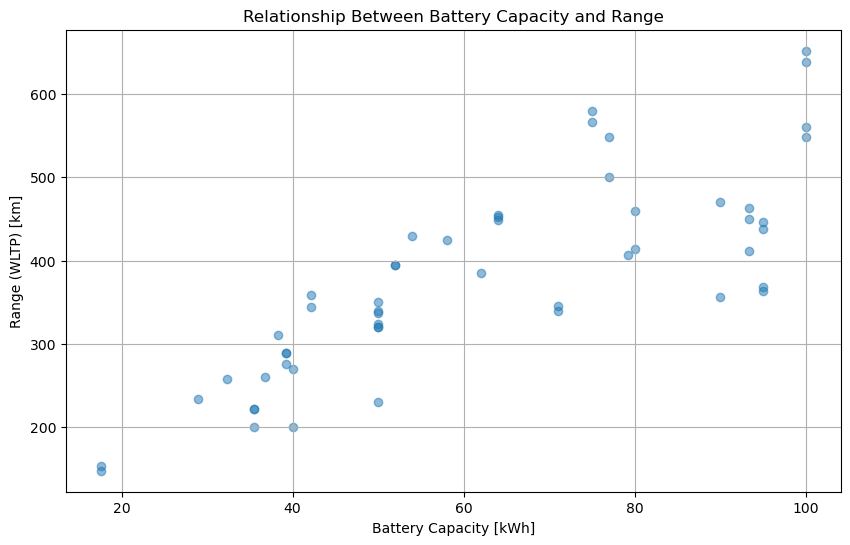

In [61]:
plt.figure(figsize=(10,6))
plt.scatter(fev_df['Battery capacity [kWh]'], fev_df['Range (WLTP) [km]'], alpha=0.5)
plt.title('Relationship Between Battery Capacity and Range')
plt.xlabel('Battery Capacity [kWh]')
plt.ylabel('Range (WLTP) [km]')
plt.grid(True)
plt.show()


Insights 

* Positive Correlation: The Battery capacity and Range shows the positive correlation, which means that cars with high battery capacity tends to have a longer driving range.
  
* Vehicles with battery capacities between 40-80 kWh show a wide range of values in the term of range (200 km to over 500 km).

  
* The highest battery-capacity EVs (near 100kWh) tends to offer more than 500 km of range.

  
* Diminishing Result: As battery capacity increases beyond certain point (80 - 100 kWh), the increase in range is not as steep, suggesting diminishing returns on  range improvements per additional kWh. 

# Task 4 

 Build an EV recommendation class. The class should allow users to input their budget, desired range, and battery capacity. 
 The class should then return the top three EVs matching their criteria. 

In [111]:
class EV_Recommendation:

    def __init__(self, fev_df):
        self.fev_df = fev_df

    def Recommend (self, budget, desired_range, battery_capacity):
        recommendations = self.fev_df[ 
                                      (self.fev_df["Minimal price (gross) [PLN]"] <= budget) & 
                                      (self.fev_df["Range (WLTP) [km]"] >= desired_range) &
                                      (self.fev_df["Battery capacity [kWh]"] >= battery_capacity)         
                                     ]

        Top_3_Recommend_EVs = recommendations.sort_values(by= [ "Range (WLTP) [km]", "Battery capacity [kWh]"], ascending=False)
        return Top_3_Recommend_EVs.head(3)
        


In [113]:
# Object Creation
ev_recommendor = EV_Recommendation(fev_df)

In [123]:
ev_recommendor.Recommend(300000,400,70)

,Car full name,Make,Model,Minimal price (gross) [PLN],Engine power [KM],Maximum torque [Nm],Type of brakes,Drive type,Battery capacity [kWh],Range (WLTP) [km],...,Permissable gross weight [kg],Maximum load capacity [kg],Number of seats,Number of doors,Tire size [in],Maximum speed [kph],Boot capacity (VDA) [l],Acceleration 0-100 kph [s],Maximum DC charging power [kW],mean - Energy consumption [kWh/100 km]
40,Tesla Model 3 Long Range,Tesla,Model 3 Long Range,235490,372,510,disc (front + rear),4WD,75.0,580,...,NaN,NaN,5,5,18,233,425.0,4.4,150,NaN
41,Tesla Model 3 Performance,Tesla,Model 3 Performance,260490,480,639,disc (front + rear),4WD,75.0,567,...,NaN,NaN,5,5,20,261,425.0,3.3,150,NaN
48,Volkswagen ID.3 Pro S,Volkswagen,ID.3 Pro S,179990,204,310,disc (front) + drum (rear),2WD (rear),77.0,549,...,2280.0,412.0,5,5,19,160,385.0,7.9,125,15.9


Insights 

* The EV_Recommendation Class filters and ranks EVs based on user inputs, which allow the users a customized recommendation based on budget, range and battery capacity. Sorting by range and battery capacity ensures customers get the best value.
   
* Cost and Features: The recommendation system enables users to find a balance between price and performance (such as range and battery capacity). Users with a stricter budget will see less expensive options, while those who are open to spending more can explore EVs with greater battery capacities and extended ranges.


* Range and Battery Capacity as Essential Factors:  For the majority of EV buyers, range and battery capacity are significant aspects to consider during the decision-making process. This class emphasizes these factors in the recommendations, showing how these features matters most potential EV owners.

  
* Car dealerships and online platforms can integrate such recommendations to enhance customer experience.

# Task 5 

 Inferential Statistics– Hypothesis Testing: Test whether there is a significant
 difference in the average Engine power [KM] of vehicles manufactured by two leading
 manufacturers i.e. Tesla and Audi. What insights can you draw from the test results?
 Recommendations and Conclusion: Provide actionable insights based on your analysis.
 (Conduct a two sample t-test using ttest_ind from scipy.stats module)

In [129]:
# for Hypothesis testing , I claim that:

#   Null Hypothesis:         H0 = There is no significant difference between avg engine power of Tesla and Audi. 
#   Alternative Hypothesis:  H1 = There is a significant difference between avg engine power of Tesla and Audi.

# If P-value <= 0.05 then I need to reject null hypothesis and if P- value is >= 0.05 then I fail to reject null hypothesis.


Tesla_enginepower= fev_df[fev_df["Make"] == "Tesla"]["Engine power [KM]"]

Audi_enginepower = fev_df[fev_df["Make"] == "Audi"]["Engine power [KM]"]

t_stat , p_value = stats.ttest_ind(Tesla_enginepower,Audi_enginepower)

print(f"T-statistic : {t_stat}, P-value : {p_value}")

alpha= 0.05           # significance level
if p_value < alpha :
    print("Reject Null Hypothesis")
else :
    print("Fail to Reject Null Hypothesis")
    

T-statistic : 1.7024444538261416, P-value : 0.11672692675082785
Fail to Reject Null Hypothesis


   Result 
* T- Statistic =  1.70
* P- Value = 0.11 
* Since the p-value(0.1167) is greater than significance level (0.05), we fail to reject the null hypothesis.
* This means there is no any statistically significant difference in the average engine power between Tesla and Audi EVs.

Insights:

* The average engine power of Tesla and Audi EVs is very similar, which means that statistically both brands offer similar performance in terms of engine power.

* Since engine power does not appear to significantly differ between Tesla and Audi EVs, other factors such as range, battery capacity, charging speed, price, and interior features could be more important in influencing a customer's purchasing decision.

* The lack of significant difference indicate that both brands are aligned in terms of technological advancement, at least regarding engine power.


Recommendation and Conclusion :
* There is no significant difference in engine power between Tesla and Audi EVs, suggesting that performances based on engine power should not be a deciding factor for customers choosing between these two brands. So on choosing between Tesla and Audi EVs, buyer may prioritize other factors beyond engine power, such as range, price and battery capacity, since there is no significant difference in engine power. It could be worthwhile for customers to evaluate other performance metric such as how the car handle on the road, their acceleration and overall driving experience.

* Both Tesla and Audi could highlight other differentiating features in their marketing and sales strategies, such as good battery technology, longer range or faster charging speeds etc. So focusing on these attributes could give a competitive edge. 

# Task 6

https://drive.google.com/file/d/1e0EDkYGQhIBz50RA8nrt8zs32pOGkFBf/view?usp=sharing